In [0]:
#Classifying Handwritten Digits from MNIST Dataset using CNN

In [0]:
#Importing Libraries

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.utils import to_categorical


In [0]:
#Loading Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

#Shape of image
print(x_train.shape) 
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


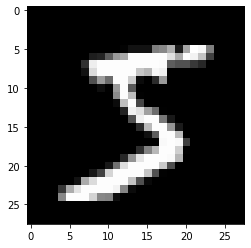

In [0]:
#Displaying image at index = 0 as picture
plt.imshow(x_train[0], cmap = 'gray')

In [0]:
#Resizing image to fit model
x_train = x_train/255
x_test = x_test/255

In [0]:
#One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [0]:
#Building CNN Model
model = Sequential()

#First Layer
model.add(Conv2D(64, 3, activation = 'relu', input_shape = (28, 28, 1)))

#Second Layer
model.add(Conv2D(32, 3, activation = 'relu'))

model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [0]:
#Compiling Model
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
#Training Model
hist = model.fit(x_train, y_train_one_hot,
                 validation_data = (x_test, y_test_one_hot),
                 epochs = 3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 160s 3ms/step - loss: 0.0725 - accuracy: 0.9781 - val_loss: 0.0565 - val_accuracy: 0.9822
Epoch 2/3
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0415 - accuracy: 0.9872 - val_loss: 0.0412 - val_accuracy: 0.9865
Epoch 3/3
60000/60000 [==============================] - 159s 3ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0405 - val_accuracy: 0.9880


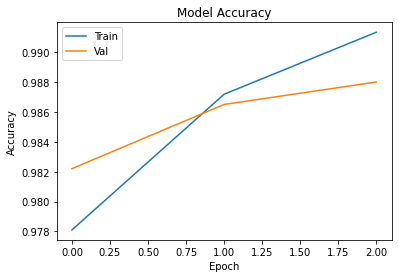

In [0]:
#Visualizing Model Accuracy

plt.title('Model Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()

In [0]:
#Predictions for first 3 images of test images
predictions = model.predict(x_test[:3])
print(predictions)

[[2.2754440e-10 3.7687206e-14 3.5466123e-09 5.0978524e-05 1.3220323e-14
  1.4133027e-10 2.8345140e-19 9.9994898e-01 2.9028657e-09 2.5100045e-08]
 [2.7233005e-09 7.2868806e-07 9.9999893e-01 1.2304288e-10 3.8425350e-13
  2.3004695e-12 4.6646242e-08 6.1009005e-15 3.0010349e-07 1.0136561e-12]
 [7.2283120e-07 9.9958605e-01 2.3949146e-05 2.4810327e-06 7.6228913e-05
  1.8910963e-05 3.8710355e-06 2.2535309e-05 2.6324356e-04 2.0028251e-06]]


In [0]:
#Labels for first 3 images of test images
print(y_test[:3])

[7 2 1]


In [0]:
#Printing prediction of model with labels of first 3 test images
print(np.argmax(predictions, axis = 1))

[7 2 1]


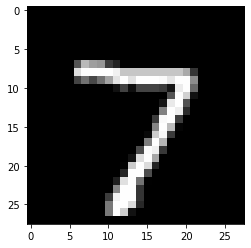

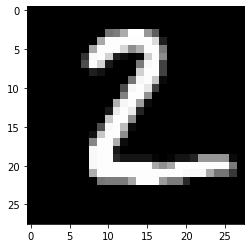

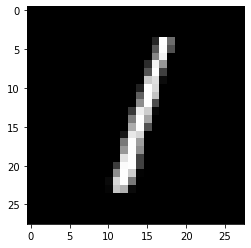

In [0]:
#Display first 3 test images
for i in range (0, 3):
  img = x_test[i]
  img = np.array(img, dtype = 'float')
  re_img = img.reshape((28,28))
  plt.imshow(re_img, cmap = 'gray')
  plt.show()